In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import Sequential # used to build ANN
from tensorflow.keras.layers import Dense # used to add hidden layers
from sklearn.metrics import classification_report

In [2]:
# read the dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

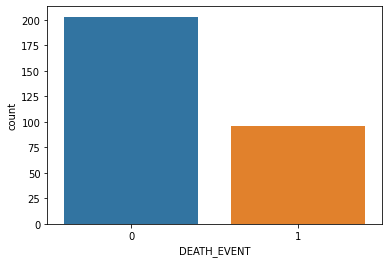

In [5]:
sns.countplot(df['DEATH_EVENT'])

In [6]:


#assigning values to features as X and target as y
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [7]:
#spliting test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=71)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 12)
(60, 12)
(239,)
(60,)


In [9]:
#Set up a standard scaler for the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 

In [10]:
X_train

array([[-0.20329345,  1.16890403, -0.20625801, ..., -1.46449201,
        -0.69604026, -0.44441423],
       [-1.36539901, -0.85550223, -0.50867365, ...,  0.68283063,
        -0.69604026, -0.59704027],
       [-1.53141409, -0.85550223,  4.3960104 , ...,  0.68283063,
         1.43669849, -0.49528958],
       ...,
       [ 2.86798552,  1.16890403, -0.23401134, ...,  0.68283063,
        -0.69604026, -0.96588652],
       [ 0.12873671, -0.85550223, -0.36799295, ...,  0.68283063,
         1.43669849, -1.47463998],
       [-1.28239147,  1.16890403,  1.206291  , ...,  0.68283063,
        -0.69604026, -0.48257074]])

In [16]:
# step 1: initialize model
ann = Sequential()

# step 2: add layers into model
ann.add(Dense(units= 10, activation = 'relu')) # create  hidden layers
ann.add(Dense(units= 10, activation = 'relu')) # create  hidden layers

ann.add(Dense(units = 1, activation = 'sigmoid')) # output layer


# step 3: establish connection between the layers
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# step 4: train the model
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 150, validation_split = 0.2)




Epoch 1/150
6/6 [==============================] - 2s 131ms/step - loss: 0.8029 - accuracy: 0.3403 - val_loss: 0.8304 - val_accuracy: 0.3125
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7732 - accuracy: 0.3508 - val_loss: 0.8067 - val_accuracy: 0.3125
Epoch 3/150
6/6 [==============================] - 0s 21ms/step - loss: 0.7484 - accuracy: 0.3717 - val_loss: 0.7846 - val_accuracy: 0.3333
Epoch 4/150
6/6 [==============================] - 0s 27ms/step - loss: 0.7246 - accuracy: 0.4241 - val_loss: 0.7644 - val_accuracy: 0.3958
Epoch 5/150
6/6 [==============================] - 0s 20ms/step - loss: 0.7038 - accuracy: 0.4503 - val_loss: 0.7464 - val_accuracy: 0.4167
Epoch 6/150
6/6 [==============================] - 0s 14ms/step - loss: 0.6868 - accuracy: 0.4921 - val_loss: 0.7294 - val_accuracy: 0.4792
Epoch 7/150
6/6 [==============================] - 0s 14ms/step - loss: 0.6688 - accuracy: 0.5393 - val_loss: 0.7141 - val_accuracy: 0.5417
Epoch 8/150
6/6 [==

In [17]:
# step 5: make predictions
y_pred = ann.predict(X_test)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[5.6291646e-01],
       [8.4400669e-02],
       [1.0792710e-02],
       [3.4195152e-01],
       [1.1708825e-02],
       [5.2020136e-02],
       [6.2205382e-02],
       [3.1800143e-02],
       [2.3907950e-02],
       [8.0514497e-01],
       [7.9514199e-01],
       [4.8968709e-01],
       [8.0889231e-01],
       [4.2456616e-02],
       [2.0562400e-01],
       [1.9417398e-01],
       [8.3172190e-01],
       [2.9036936e-01],
       [2.0525673e-01],
       [6.0600036e-01],
       [1.6603772e-02],
       [6.2161712e-03],
       [3.8612181e-01],
       [2.1511118e-01],
       [5.3075773e-01],
       [6.5496795e-02],
       [3.5690423e-02],
       [5.9423786e-01],
       [5.0989735e-01],
       [6.6816825e-01],
       [2.1678555e-01],
       [1.9325352e-01],
       [9.7599748e-04],
       [2.1181139e-03],
       [3.7843511e-01],
       [1.5000390e-02],
       [2.7494353e-01],
       [6.7775510e-02],
       [2.4826832e-02],
       [2.2854013e-03],
       [4.4204746e-03],
       [3.942714

In [18]:

# step 6: set the threshold
y_pred = np.where(y_pred<0.5, 0, 1)
y_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        43
           1       0.60      0.53      0.56        17

    accuracy                           0.77        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.76      0.77      0.76        60



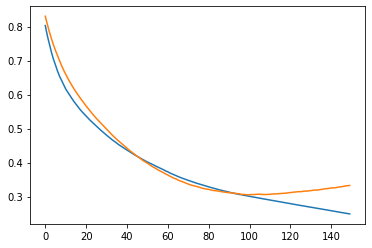

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])